# Linear regression

In [65]:
titanic=sns.load_dataset('titanic')

In [66]:
iris=sns.load_dataset('iris').copy()

In [67]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [72]:
iris['sp']=iris.sepal_width*-0.0462 + iris['petal_length']* 0.4355-0.4956

In [76]:
iris[iris['species']=='setosa'].min(),iris[iris['species']=='setosa'].max()

(sepal_length        4.3
 sepal_width         2.3
 petal_length          1
 petal_width         0.1
 species          setosa
 sp             -0.22642
 dtype: object, sepal_length        5.8
 sepal_width         4.4
 petal_length        1.9
 petal_width         0.6
 species          setosa
 sp              0.17477
 dtype: object)

In [78]:
iris[iris['species']=='versicolor'].min(),iris[iris['species']=='versicolor'].max()

(sepal_length           4.9
 sepal_width              2
 petal_length             3
 petal_width              1
 species         versicolor
 sp                  0.6954
 dtype: object, sepal_length             7
 sepal_width            3.4
 petal_length           5.1
 petal_width            1.8
 species         versicolor
 sp                 1.60071
 dtype: object)

In [79]:
iris[iris['species']=='virginica'].min(),iris[iris['species']=='virginica'].max()

(sepal_length          4.9
 sepal_width           2.2
 petal_length          4.5
 petal_width           1.4
 species         virginica
 sp                1.34865
 dtype: object, sepal_length          7.9
 sepal_width           3.8
 petal_length          6.9
 petal_width           2.5
 species         virginica
 sp                2.38923
 dtype: object)

In [77]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,sp
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.999760
std,0.828066,0.435866,1.765298,0.762238,0.777628
min,4.300000,2.000000,1.000000,0.100000,-0.226420
25%,5.100000,2.800000,1.600000,0.300000,0.029105
50%,5.800000,3.000000,4.350000,1.300000,1.260225
75%,6.400000,3.300000,5.100000,1.800000,1.596090
max,7.900000,4.400000,6.900000,2.500000,2.389230


In [39]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [40]:
irisex=iris[iris['species']!='setosa']

In [44]:
iris['intercept']=1

In [45]:
LE = LabelEncoder()
iris['species']=LE.fit_transform(iris['species'])

In [46]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,species,intercept
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561,NaN
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658,NaN
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035,NaN
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547,NaN
species,0.782561,-0.426658,0.949035,0.956547,1.000000,NaN
intercept,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
y,x=(iris['species']),iris[['intercept','petal_length','sepal_width']]

In [48]:
lm=sm.OLS(y.astype(float),x.astype(float)).fit()

In [49]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                species   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     670.1
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.34e-74
Time:                        19:57:19   Log-Likelihood:                -8.8624
No. Observations:                 150   AIC:                             23.72
Df Residuals:                     147   BIC:                             32.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.4956      0.193     -2.569      0.011      -0.877      -0.114
petal_length     0.4355      0.013     32.703      0.000       0.409       0.462
sepal_width     -0.0462      0.054     -0.856      0.393      -0.153       0.060
==============================================================================
Omnibus:                        0.628   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.742
Skew:                           0.056   Prob(JB):                        0.690
Kurtosis:                       2.674   Cond. No.                         48.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,intercept
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [62]:
pl=float(input('please enter length of petal'))
sw=float(input('please enter width of sepal '))
sp= sw*-0.0462 + pl* 0.4355-0.4956
print(sp)
if sp <3 and sp>1.5:
    print('Species is virginica')
elif sp<1.5 and sp>0.5:
    print('Species is versicolor ')
elif sp<.5 and sp>-.2:
    print('species is setosa')
    print("this species does not exist")

        
        
            
    

please enter length of petal5.1
please enter width of sepal .2
1.7162099999999998
Species is virginica


In [53]:
print(sp)

-0.07677999999999985


In [88]:
result=lm.predict()

AttributeError: 'numpy.ndarray' object has no attribute 'model'

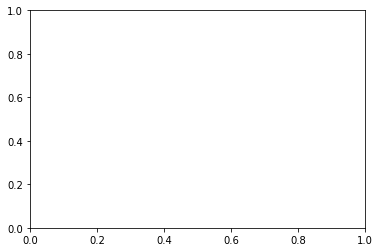

In [89]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(result, 0, ax=ax)
ax.set_ylabel("species")
ax.set_xlabel("sepalpetal lenth")
ax.set_title("OLS Regression")

AttributeError: 'numpy.ndarray' object has no attribute 'model'

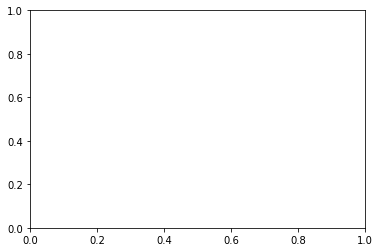

In [90]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(result, 1, ax=ax)
ax.set_ylabel("species")
ax.set_xlabel("sepalpetal lenth")
ax.set_title("OLS Regression")

# Logistic Regression

In [80]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [81]:
titanic['intercept']=1
log=sm.Logit(titanic['survived'],titanic[['intercept','pclass','fare']]).fit()

Optimization terminated successfully.
         Current function value: 0.604357
         Iterations 5


In [82]:
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Sat, 23 May 2020   Pseudo R-squ.:                 0.09244
Time:                        20:16:01   Log-Likelihood:                -538.48
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.517e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8971      0.295      3.042      0.002       0.319       1.475
pclass        -0.6840      0.107     -6.383      0.000      -0.894      -0.474
fare           0.0055      0.002      2.454      0.014       0.001       0.010
==============================================================================
"""

In [83]:
np.exp(-0.6840), np.exp(0.0055)

(0.5045945719335512, 1.0055151527673363)

# Scikit logistic regressoin

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

In [51]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [52]:
y=titanic['survived']
x=titanic[['pclass','fare']]

In [53]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [54]:
logreg=LogisticRegression()

In [55]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_pred=logreg.predict(X_test)

In [57]:
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred),"Accuracy Score")

[[122  17]
 [ 48  36]]
0.6792452830188679
0.42857142857142855
0.7085201793721974 Accuracy Score


In [91]:
# Model 
